In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform

<ipython-input-5-569cd7a6486b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121, frameon=False)


Text(0, 0.5, 'Number of pixels')

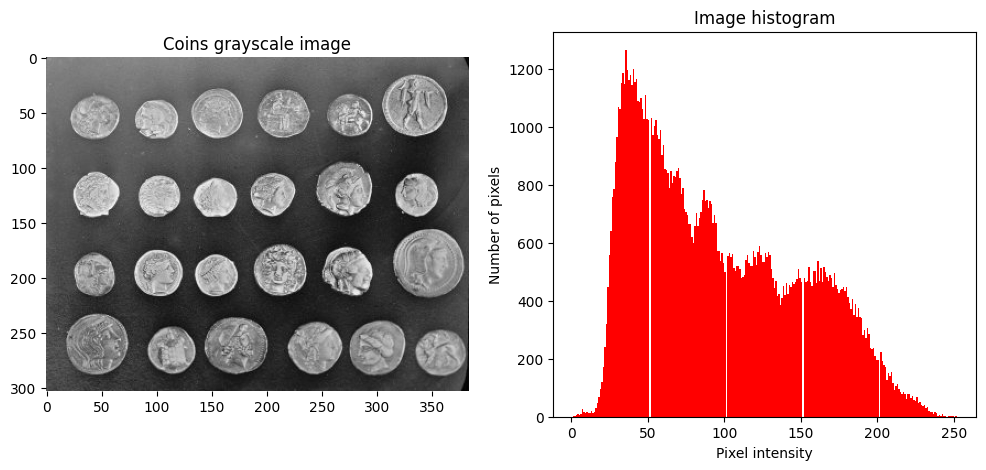

In [ ]:
image = data.coins()
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax1 = plt.subplot(121, frameon=False)
ax1.imshow(image, cmap='gray')
ax1.set_title('Coins grayscale image')
ax2 = plt.subplot(122)
pt1 = ax2.hist(image.ravel(), bins=256, histtype='bar', color='red')
ax2.set_title("Image histogram")
ax2.set_xlabel("Pixel intensity")
ax2.set_ylabel("Number of pixels")

Text(0.5, 1.0, 'Contrast enhanced image')

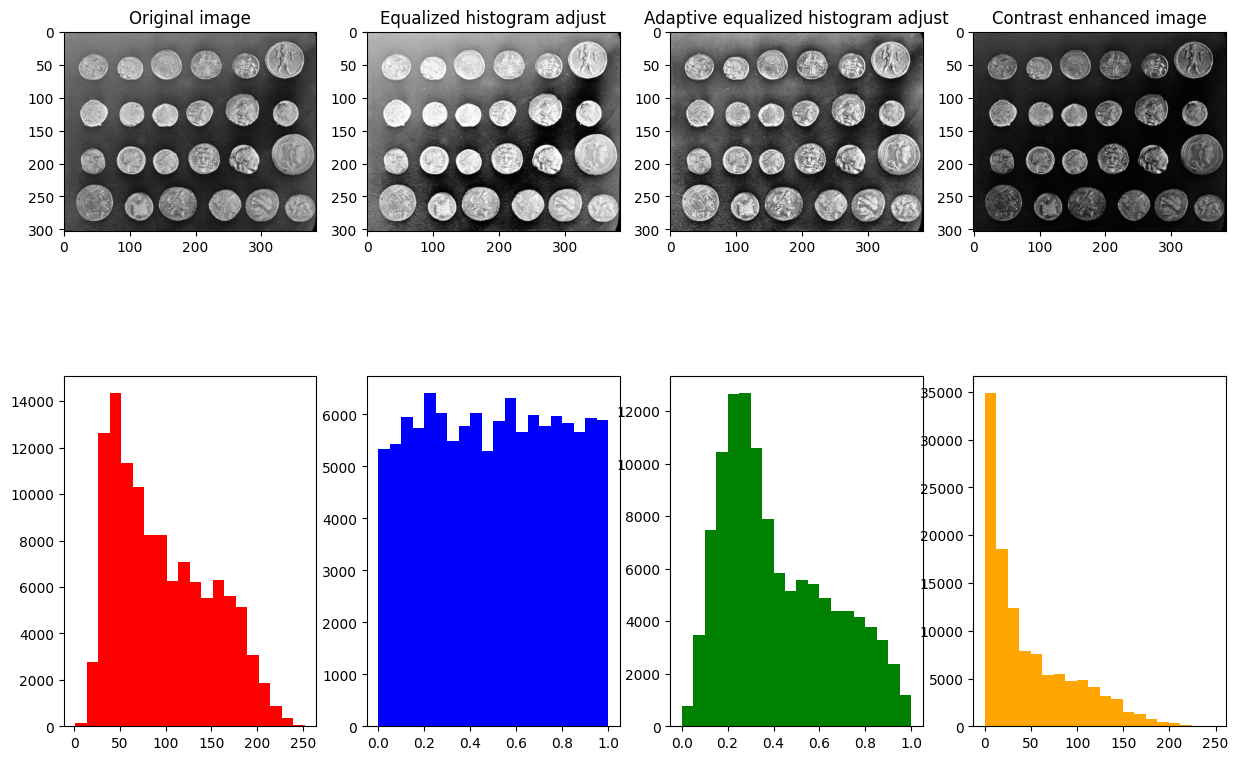

In [ ]:
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = plt.subplot(2, 4, 1)
axes[0, 1] = plt.subplot(242)
axes[0, 2] = plt.subplot(243)
axes[0, 3] = plt.subplot(244)
axes[1, 0] = plt.subplot(245)
axes[1, 1] = plt.subplot(246)
axes[1, 2] = plt.subplot(247)
axes[1, 3] = plt.subplot(248)

axes[0, 0].imshow(image, cmap='gray')
axes[1, 0].hist(image.ravel(), bins=20, histtype='bar', color='red')
axes[0, 0].set_title('Original image')

image_eq = exposure.equalize_hist(image)
axes[0, 1].imshow(image_eq, cmap='gray')
axes[1, 1].hist(image_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0, 1].set_title('Equalized histogram adjust')

image_adapt_eq = exposure.equalize_adapthist(image)
axes[0, 2].imshow(image_adapt_eq, cmap='gray')
axes[1, 2].hist(image_adapt_eq.ravel(), bins=20, histtype='bar', color='green')
axes[0, 2].set_title('Adaptive equalized histogram adjust')

image_contrast_enhanced = exposure.adjust_gamma(image, 2)
axes[0, 3].imshow(image_contrast_enhanced, cmap='gray')
axes[1, 3].hist(image_contrast_enhanced.ravel(), bins=20, histtype='bar', color='orange')
axes[0, 3].set_title('Contrast enhanced image')

(array([ 2208.,  2600.,  5164.,  7808., 44460., 93280., 63284., 28824.,
         6196.,  2132.,  1244.,  1160.,   712.,   444.,   472.,   588.,
          572.,   344.,   272.,   380.]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

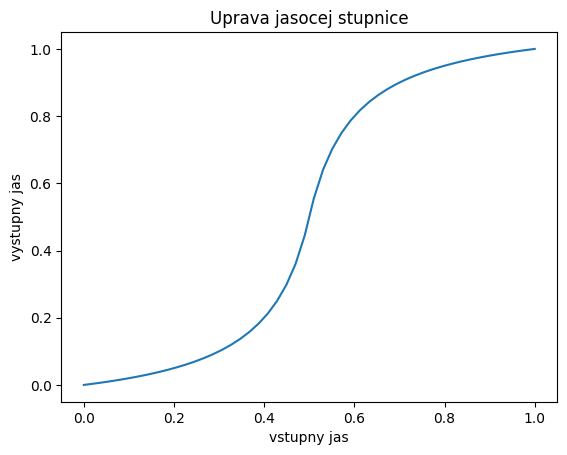

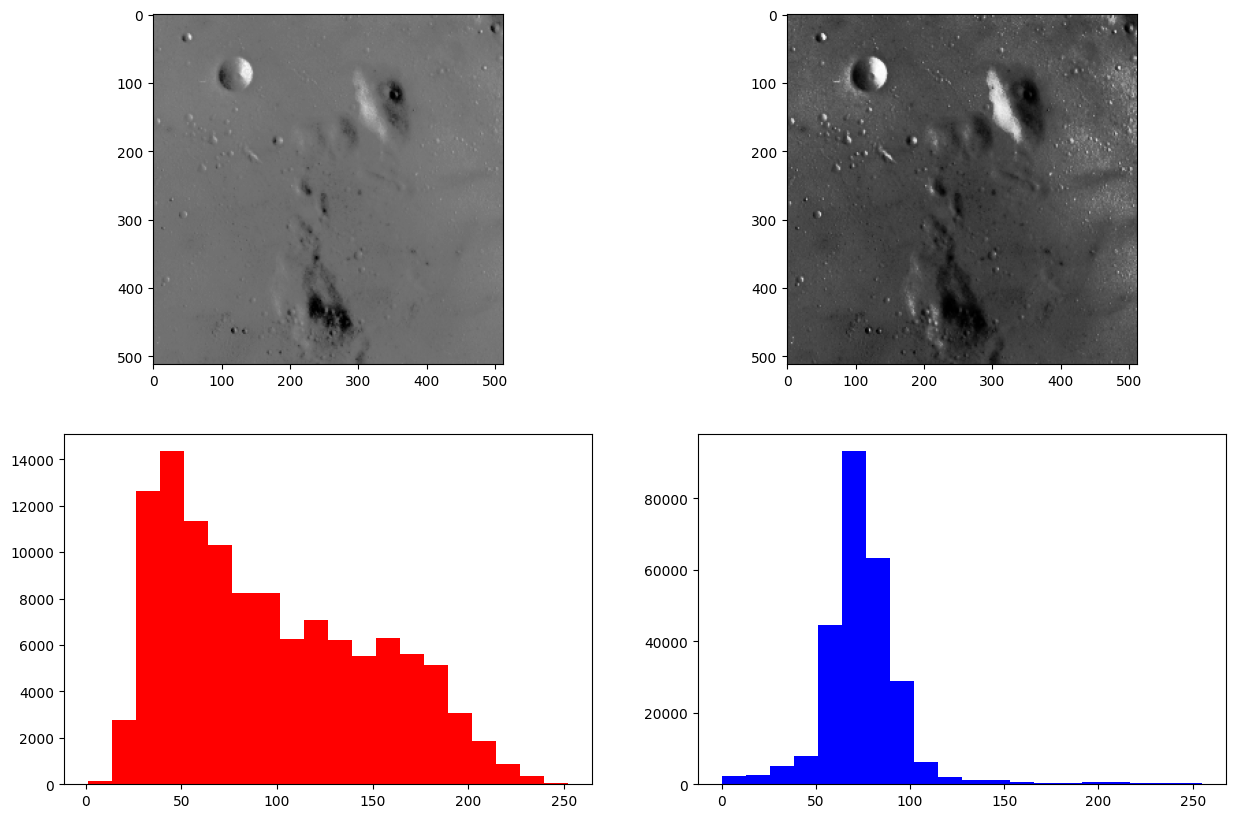

In [ ]:
x = np.linspace(0, 1, 50)
p = 10
c = (0.5*p)/(1+0.5*p)
plt.figure()
y = (((x-0.5)*p)/(1+abs((x-0.5)*p))+c)/(2*c)
plt.plot(x, y)
plt.title('Uprava jasocej stupnice')
plt.xlabel('vstupny jas')
plt.ylabel('vystupny jas')

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(data.moon(), cmap='gray')
plt.subplot(222)
im = data.moon()/255
adj_im = (((im-0.5)*p)/(1+abs((im-0.5)*p))+c)/(2*c)
plt.imshow(adj_im, cmap='gray')
plt.subplot(223)
plt.hist(data.coins().ravel(), bins=20, histtype='bar', color='red')
plt.subplot(224)
plt.hist((adj_im*255).ravel(), bins=20, histtype='bar', color='blue')

<ipython-input-28-178ab127d97a>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(r.ravel(), g.ravel(), b.ravel(), cmap='viridis', linewidth=0.5)


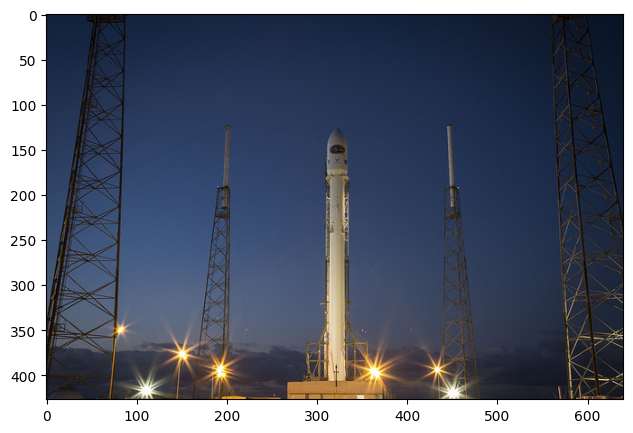

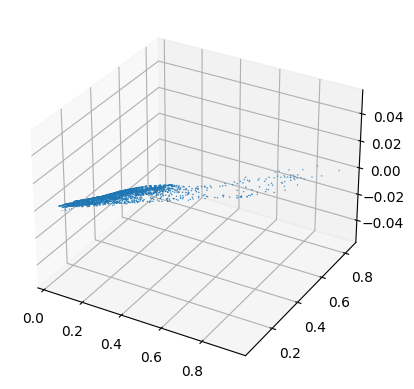

In [ ]:
shape = np.floor(np.asarray(data.rocket().shape[0:2])/10).astype(dtype=np.int64)
shape = np.hstack((shape, 3))
im = transform.resize(data.rocket(), shape)
plt.figure(figsize=(10, 5))
plt.imshow(data.rocket())

plt.figure()
r = im[:, :, 0]
g = im[:, :, 1]
b = im[:, :, 2]
ax = plt.axes(projection='3d')
plt.scatter(r.ravel(), g.ravel(), b.ravel(), cmap='viridis', linewidth=0.5)
plt.show()